## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


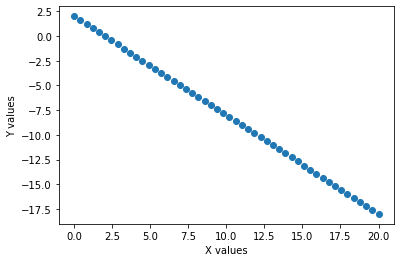

In [2]:
x=np.linspace(0,20)
xcpy=x.copy()
y=-1*x+2
x=x.reshape(len(x),1)

iteration=1500
alpha=0.01

plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

#### Plot your data points. 

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
class LinearRegressionBatchGD:
    def __init__(self,x,y,iteration,alpha):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.hhist=[]
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            self.theta=self.theta-(self.alpha*self.gradient)

            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
            self.hhist.append(self.h)
            
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0]),self.hhist

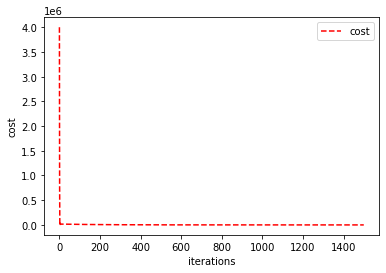

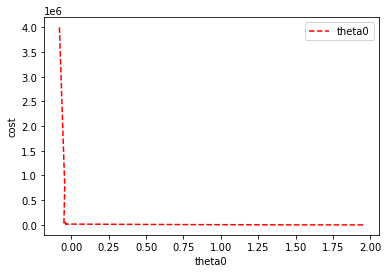

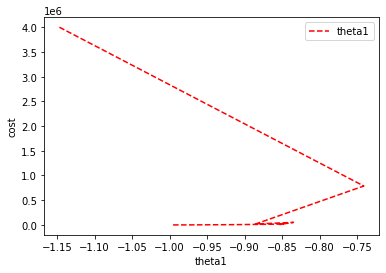

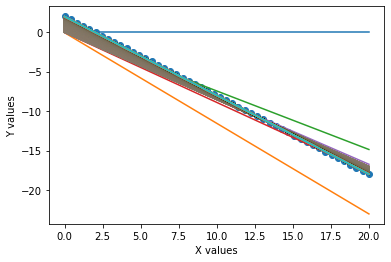

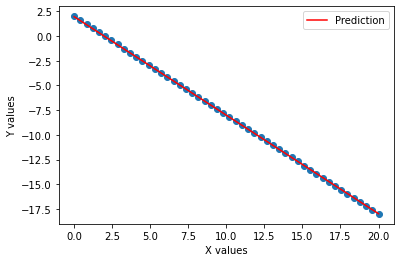

In [6]:
single_LR=LinearRegressionBatchGD(x,y,iteration,alpha) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range(iteration),costhist,"r--",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r--",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r--",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h,"r-",label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [7]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 1.95598392 -0.99672591]
predicted values =:  [  1.95587087   1.5490474    1.14222393   0.73540046   0.32857699
  -0.07824648  -0.48506995  -0.89189342  -1.29871689  -1.70554036
  -2.11236384  -2.51918731  -2.92601078  -3.33283425  -3.73965772
  -4.14648119  -4.55330466  -4.96012813  -5.3669516   -5.77377508
  -6.18059855  -6.58742202  -6.99424549  -7.40106896  -7.80789243
  -8.2147159   -8.62153937  -9.02836284  -9.43518631  -9.84200979
 -10.24883326 -10.65565673 -11.0624802  -11.46930367 -11.87612714
 -12.28295061 -12.68977408 -13.09659755 -13.50342103 -13.9102445
 -14.31706797 -14.72389144 -15.13071491 -15.53753838 -15.94436185
 -16.35118532 -16.75800879 -17.16483227 -17.57165574 -17.97847921]
model accuracy using r2 score = 0.999985542029886


### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

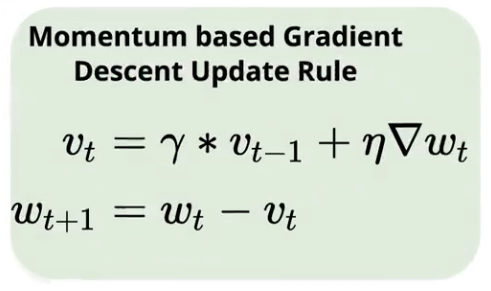

#### γ takes values between 0 and 1.
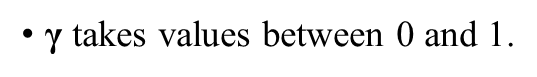

In [8]:
class LinearRegressionBatchGDMomentum:
    def __init__(self,x,y,iteration,alpha,momentum):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.momentum=momentum
        self.oldvt=0  #initial value for history of gradient
        self.vt=0
        self.hhist=[]
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            
            self.vt=(self.momentum*self.oldvt)+(self.alpha*self.gradient) #new value
            
            self.theta=self.theta-self.vt #update theta considering history of gradient
            self.oldvt=self.vt #set olt history to the current history to accumelate it for next iteration
        
            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
            self.hhist.append(self.h)
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0]),self.hhist
    

In [9]:
iteration=200
alpha=0.01
momentum=0.9

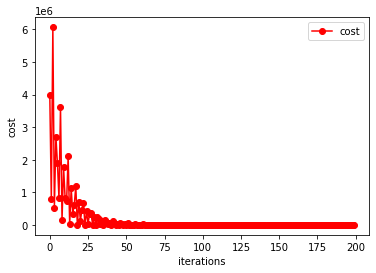

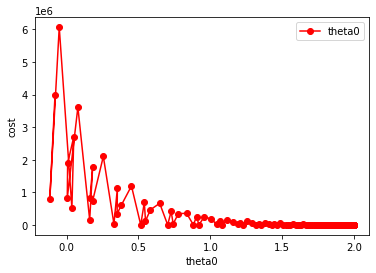

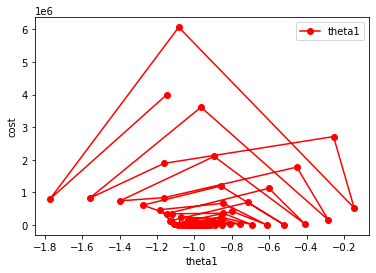

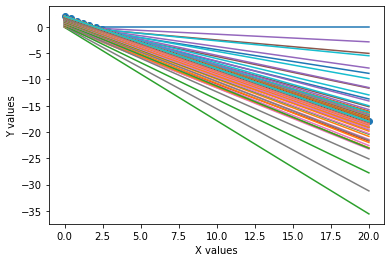

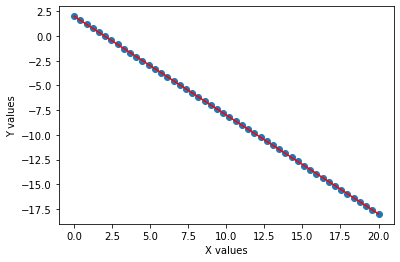

In [10]:
single_LR=LinearRegressionBatchGDMomentum(x,y,iteration,alpha,momentum) #single linear regression using batch GD with momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range(iteration),costhist,"r-o",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h,"r-",label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend
plt.show()

In [12]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 1.99894696 -0.99991132]
predicted values =:  [  1.99889758   1.59075858   1.18261958   0.77448057   0.36634157
  -0.04179743  -0.44993643  -0.85807543  -1.26621443  -1.67435344
  -2.08249244  -2.49063144  -2.89877044  -3.30690944  -3.71504844
  -4.12318745  -4.53132645  -4.93946545  -5.34760445  -5.75574345
  -6.16388245  -6.57202146  -6.98016046  -7.38829946  -7.79643846
  -8.20457746  -8.61271646  -9.02085547  -9.42899447  -9.83713347
 -10.24527247 -10.65341147 -11.06155047 -11.46968948 -11.87782848
 -12.28596748 -12.69410648 -13.10224548 -13.51038448 -13.91852348
 -14.32666249 -14.73480149 -15.14294049 -15.55107949 -15.95921849
 -16.36735749 -16.7754965  -17.1836355  -17.5917745  -17.9999135 ]
model accuracy using r2 score = 0.9999999890289907


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [31]:
iteration=200
alpha=0.01
momentum=0

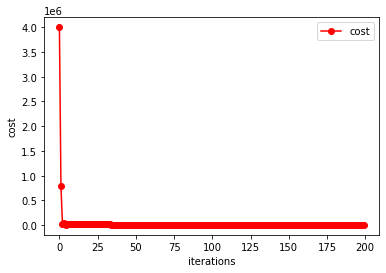

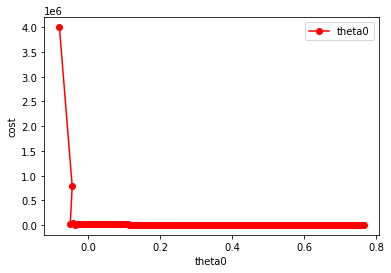

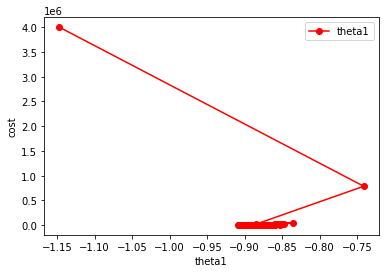

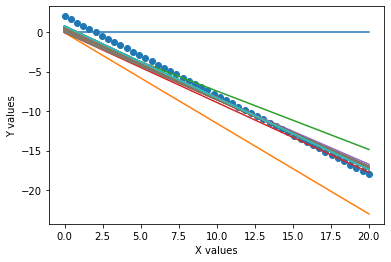

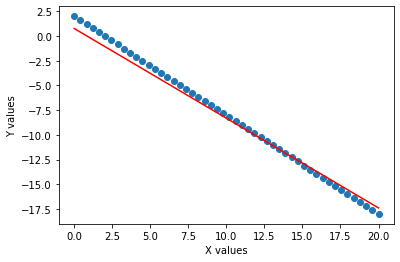

In [32]:
single_LR=LinearRegressionBatchGDMomentum(x,y,iteration,alpha,momentum) #single linear regression using batch GD with momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range(iteration),costhist,"r-o",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h,"r-",label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend
plt.show()

In [33]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 0.76488149 -0.90812708]
predicted values =:  [  0.76170948   0.39114166   0.02057385  -0.34999396  -0.72056177
  -1.09112958  -1.46169739  -1.8322652   -2.20283301  -2.57340082
  -2.94396863  -3.31453644  -3.68510426  -4.05567207  -4.42623988
  -4.79680769  -5.1673755   -5.53794331  -5.90851112  -6.27907893
  -6.64964674  -7.02021455  -7.39078236  -7.76135018  -8.13191799
  -8.5024858   -8.87305361  -9.24362142  -9.61418923  -9.98475704
 -10.35532485 -10.72589266 -11.09646047 -11.46702828 -11.8375961
 -12.20816391 -12.57873172 -12.94929953 -13.31986734 -13.69043515
 -14.06100296 -14.43157077 -14.80213858 -15.17270639 -15.5432742
 -15.91384201 -16.28440983 -16.65497764 -17.02554545 -17.39611326]
model accuracy using r2 score = 0.9886158190844685


### Update your Batch GD for one variable  implementation to be NAG and check your results

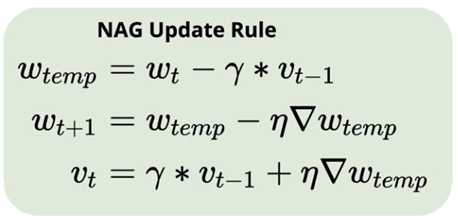

In [7]:
class LinearRegressionBatchGDNAG:
    def __init__(self,x,y,iteration,alpha,momentum):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.momentum=momentum
        self.oldvt=0  
        self.vt=0
        self.thetatemp=0
        self.hhist=[]
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            


            
            
            self.thetatemp=self.theta-(self.momentum*self.oldvt)
            
            self.htemp=self.hypo(self.x,self.thetatemp)
            
            self.cost=self.loss(self.htemp,self.y)
            self.gradienttemp=self.grad(self.htemp,self.y,self.x)  
            
            self.theta=self.thetatemp-(self.alpha*self.gradienttemp)
            
            
            self.vt=(self.momentum*self.oldvt)+(self.alpha*self.gradienttemp)
            
             
            self.oldvt=self.vt
        
            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
            self.hhist.append(self.htemp)
        return self.theta,self.htemp,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0]),self.hhist

In [8]:
iteration=1500
alpha=0.002
momentum=0.15

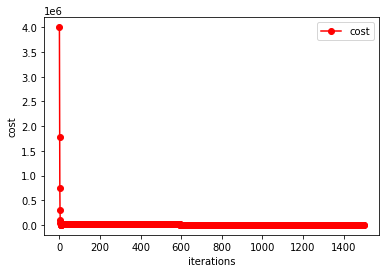

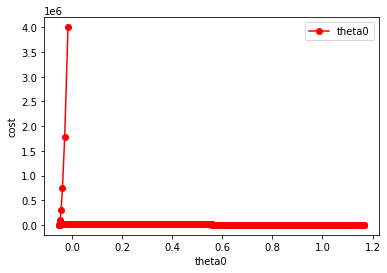

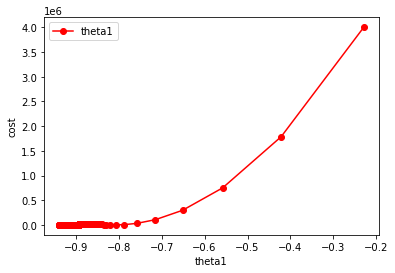

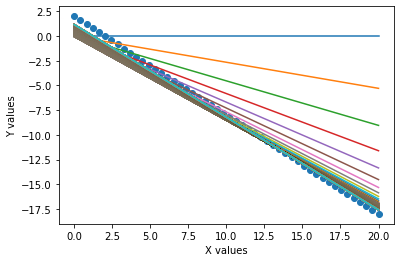

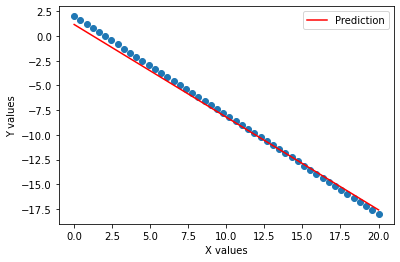

In [9]:
single_LR=LinearRegressionBatchGDNAG(x,y,iteration,alpha,momentum) #single linear regression using batch GD with NAG

theta,h,costhist,thetahist,hhist=single_LR.train()


plt.plot(range(iteration),costhist,"r-o",label="cost")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
plt.xlabel("theta0")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
plt.xlabel("theta1")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

plt.scatter(xcpy,y)
plt.plot(xcpy, h,"r-",label="Prediction")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

In [10]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 1.16484018 -0.93787757]
predicted values =:  [ 1.16441209e+00  7.81617921e-01  3.98823748e-01  1.60295758e-02
 -3.66764597e-01 -7.49558770e-01 -1.13235294e+00 -1.51514711e+00
 -1.89794129e+00 -2.28073546e+00 -2.66352963e+00 -3.04632381e+00
 -3.42911798e+00 -3.81191215e+00 -4.19470632e+00 -4.57750050e+00
 -4.96029467e+00 -5.34308884e+00 -5.72588301e+00 -6.10867719e+00
 -6.49147136e+00 -6.87426553e+00 -7.25705970e+00 -7.63985388e+00
 -8.02264805e+00 -8.40544222e+00 -8.78823640e+00 -9.17103057e+00
 -9.55382474e+00 -9.93661891e+00 -1.03194131e+01 -1.07022073e+01
 -1.10850014e+01 -1.14677956e+01 -1.18505898e+01 -1.22333839e+01
 -1.26161781e+01 -1.29989723e+01 -1.33817665e+01 -1.37645606e+01
 -1.41473548e+01 -1.45301490e+01 -1.49129432e+01 -1.52957373e+01
 -1.56785315e+01 -1.60613257e+01 -1.64441198e+01 -1.68269140e+01
 -1.72097082e+01 -1.75925024e+01]
model accuracy using r2 score = 0.9948162866173658


## Congratulations 
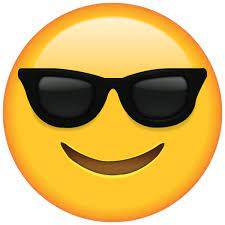